In [3]:
# Importing dependencies
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

from SpUtils import *

In [5]:
# Setup path to dataset and its annotation
dataDir='./scripts/coco'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
# Initialize COCO API for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=7.02s)
creating index...
index created!


Length of imgIds : 21634
Randint result : 168
A sample image info:
{'license': 1, 'file_name': 'COCO_val2014_000000089648.jpg', 'coco_url': 'http://mscoco.org/images/89648', 'height': 427, 'width': 640, 'date_captured': '2013-11-24 00:56:58', 'flickr_url': 'http://farm7.staticflickr.com/6168/6148670625_1caaf41c72_z.jpg', 'id': 89648}


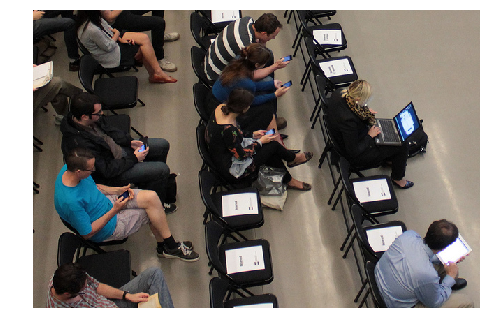

In [6]:
# Get category ID by keyword
catIds = coco.getCatIds(catNms=['person'])
# Get image ID from category ID
imgIds = coco.getImgIds(catIds=catIds)
# Print length of imgIds
print("Length of imgIds : {}".format(len(imgIds)))
# Get a random index in imgIds
print("Randint result : {}".format(np.random.randint(0, len(imgIds))))
# Get a random image by picking randomly from imgIds
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# Print all information of an image
print("A sample image info:\n{}".format(img))
# Read picked image and display it 
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

Nummber of labeled object in image: 11
Object[0]: [224.58, 125.06, 180.25, 132.06]
Object[1]: [58.8, 4.58, 147.47, 101.21]
Object[2]: [28.29, 197.56, 214.75, 166.32]
Object[3]: [411.64, 100.26, 134.3, 165.29]
Object[4]: [37.83, 119.05, 169.49, 174.62]
Object[5]: [18.84, 362.24, 184.52, 64.76]
Object[6]: [0.0, 0.0, 68.23, 88.82]
Object[7]: [487.48, 298.58, 144.43, 128.42]
Object[8]: [256.69, 53.21, 98.99, 75.6]
Object[9]: [88.33, 0.0, 122.83, 89.3]
Object[10]: [239.28, 4.4, 118.11, 107.56]


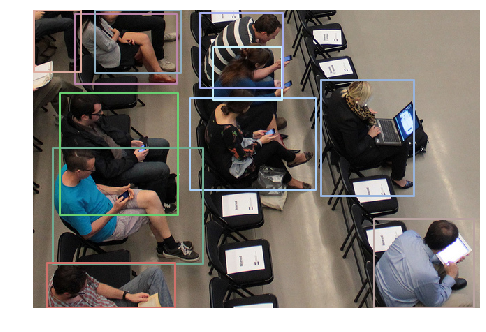

In [7]:
# Load and display instance's annotation
plt.imshow(I);  plt.axis('off')
# Load annotation id from image id
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# Load annotation by id 
anns = coco.loadAnns(annIds)
# Number of labeled object in image
print("Nummber of labeled object in image: {}".format(len(anns)))
# Printf all bounding box info of each labeled object: [x, y, width, height]
for index, ann in enumerate(anns):
    print("Object[{}]: {}".format(index, ann['bbox']))
# Display and draw bounding box
# coco.showAnns(anns, draw_bbox=True)
drawbbox(anns)